# Gaussian Naïve Bayes

This Notebook will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
# your code here
def estimateGaussianParameters(X_train,y_train,labels):
    d=[[() for i in range(X_train.shape[1])] for j in range(len(labels)+1)]
    counts={}
    for r in labels:
        data = X_train[np.where(y_train==r)[0],:]
        data = np.asarray(data)
        counts[r]=data.shape[0]/X_train.shape[0]
        for col in range(X_train.shape[1]):
            d[r][col]=(np.mean(data[:,col]),np.std(data[:,col]))
    return d

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
# your code here
def getPriors(X_train,y_train,labels):
    counts={}
    for r in labels:
        data = X_train[np.where(y_train==r)[0],:]
        data = np.asarray(data)
        counts[r]=data.shape[0]/X_train.shape[0]
    return counts

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
# your code 
def liklihood(datapoint,labels,priors,d):
    for r in labels:
        prob=priors[r]
        for j in range(datapoint.shape[0]):
            prob *= gaussianFormula(datapoint[j],d[r][j])
        print("Liklihood of class-"+str(r)+" = ",prob)

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [5]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')

In [6]:
data.head()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
0,-47,-53,-54,-49,-63,-88,-85,3
1,-50,-57,-60,-43,-66,-77,-82,3
2,-44,-50,-57,-45,-61,-72,-67,2
3,-48,-59,-53,-45,-74,-81,-81,3
4,-60,-54,-59,-65,-66,-83,-84,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ws1     2000 non-null   int64
 1   ws2     2000 non-null   int64
 2   ws3     2000 non-null   int64
 3   ws4     2000 non-null   int64
 4   ws5     2000 non-null   int64
 5   ws6     2000 non-null   int64
 6   ws7     2000 non-null   int64
 7   r       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [8]:
data.describe()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [9]:
# your code here
# Train test split
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(f'X: {X.shape}')
print(f'y: {y.shape}')
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=41)

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print()

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print()

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

cols=X_train.shape[1]
labels=np.unique(y_train)


X: (2000, 7)
y: (2000,)

X_train: (1500, 7)
y_train: (1500,)

X_test: (500, 7)
y_test: (500,)



### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [10]:
def gaussianFormula(x,tple):
    mean, dev = tple
    dev=dev**2
    exp = pow(np.e,(-(x-mean)**2)/(2*dev))
    term1 = 1/(np.sqrt(2*(np.pi)*dev))
    return term1*exp

In [11]:
# your code here
d= estimateGaussianParameters(X_train,y_train,labels)
priors=getPriors(X_train,y_train,labels)

Estimating liklihood of first test sample for each class

In [12]:
liklihood(X_test[0],labels,priors,d)

Liklihood of class-1 =  1.492024823067661e-30
Liklihood of class-2 =  1.5555477238161014e-11
Liklihood of class-3 =  7.67790103602959e-16
Liklihood of class-4 =  1.4807405413867745e-36


### 1) Estimating Model on Training

In [13]:
Y_pred=[]
for i in range(X_train.shape[0]):
    data = X_train[i,:]
    maxProb=0
    mp=0
    for r in labels:
        prob=priors[r]
        for j in range(cols):
            prob *= gaussianFormula(data[j],d[r][j])
        if(prob>maxProb):
            maxProb=prob
            mp=r
    Y_pred.append(mp)
Y_pred = np.asarray(Y_pred)
Y_pred.shape

(1500,)

In [14]:
print("Accuracy on train data: ",accuracy_score(y_train,Y_pred) )

Accuracy on train data:  0.9826666666666667


### 2)Plotting the Gaussian probability density functions for each class after estimation.

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import norm

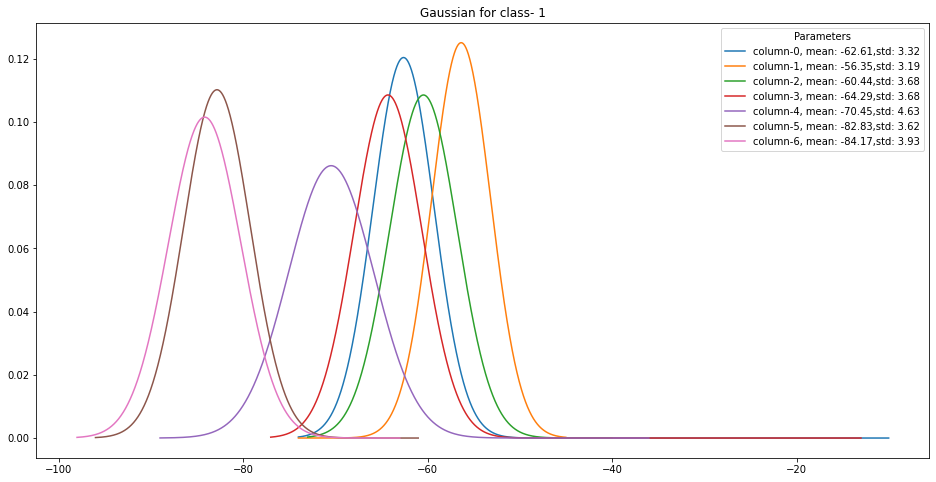

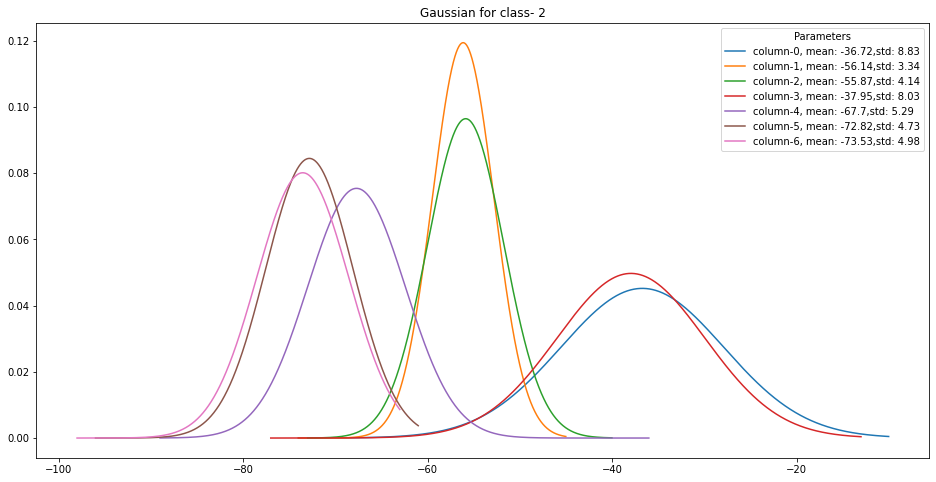

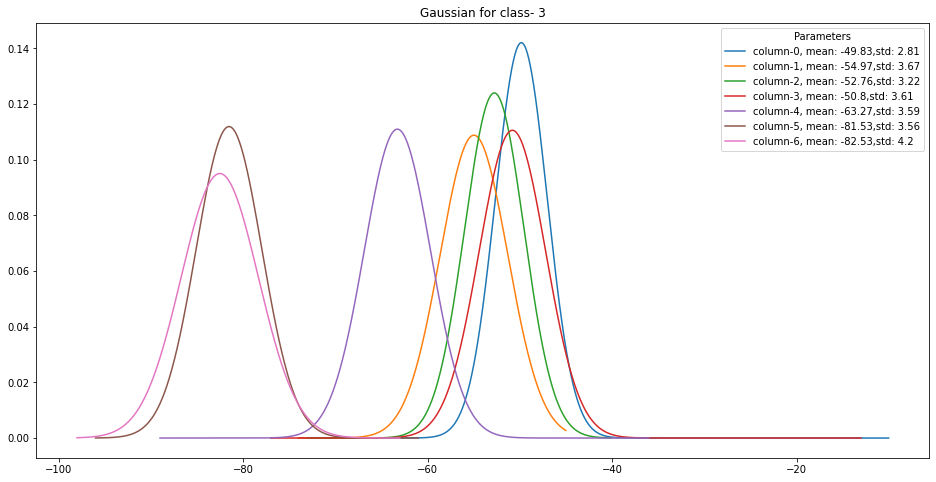

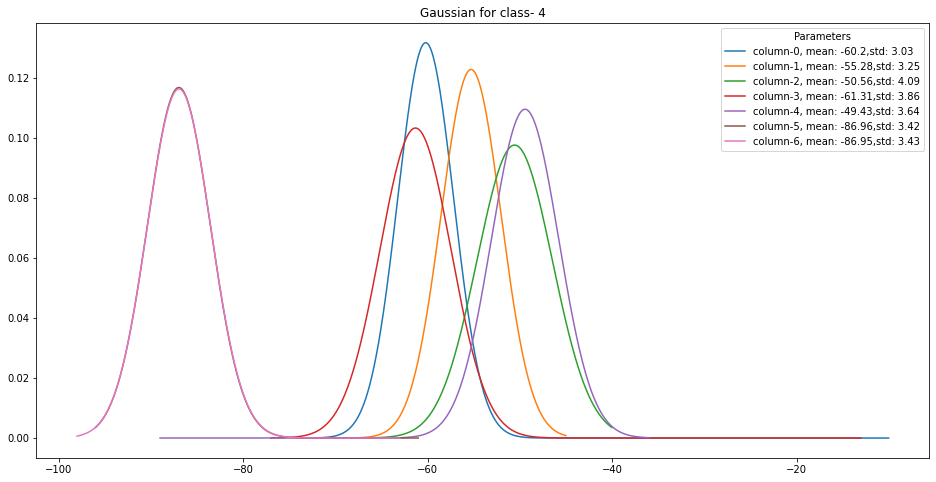

In [16]:
for r in labels:
  plt.figure(figsize=(16,8))

  x_axis = np.arange(X_train[:,0].min(), X_train[:,0].max(), 0.01)
  label='column-'+str(0)+', mean: '+str(round(d[r][0][0],2))+',std: '+str(round(d[r][0][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][0][0], d[r][0][1]),label=label)

  x_axis = np.arange(X_train[:,1].min(), X_train[:,1].max(), 0.01)
  label='column-'+str(1)+', mean: '+str(round(d[r][1][0],2))+',std: '+str(round(d[r][1][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][1][0], d[r][1][1]),label=label)

  x_axis = np.arange(X_train[:,2].min(), X_train[:,2].max(), 0.01)
  label='column-'+str(2)+', mean: '+str(round(d[r][2][0],2))+',std: '+str(round(d[r][2][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][2][0], d[r][2][1]),label=label)

  x_axis = np.arange(X_train[:,3].min(), X_train[:,3].max(), 0.01)
  label='column-'+str(3)+', mean: '+str(round(d[r][3][0],2))+',std: '+str(round(d[r][3][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][3][0], d[r][3][1]),label=label)

  x_axis = np.arange(X_train[:,4].min(), X_train[:,4].max(), 0.01)
  label='column-'+str(4)+', mean: '+str(round(d[r][4][0],2))+',std: '+str(round(d[r][4][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][4][0], d[r][4][1]),label=label)

  x_axis = np.arange(X_train[:,5].min(), X_train[:,5].max(), 0.01)
  label='column-'+str(5)+', mean: '+str(round(d[r][5][0],2))+',std: '+str(round(d[r][5][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][5][0], d[r][5][1]),label=label)

  x_axis = np.arange(X_train[:,6].min(), X_train[:,6].max(), 0.01)
  label='column-'+str(6)+', mean: '+str(round(d[r][6][0],2))+',std: '+str(round(d[r][6][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][6][0], d[r][6][1]),label=label)

  plt.title('Gaussian for class- '+str(r))
  plt.legend(title='Parameters')
  plt.show()

### 3)Classifying the test data using model.

In [17]:
Y_pred=[]
for i in range(X_test.shape[0]):
    data = X_test[i,:]
    maxProb=0
    mp=0
    for r in labels:
        prob=priors[r]
        for j in range(cols):
            prob *= gaussianFormula(data[j],d[r][j])
        if(prob>maxProb):
            maxProb=prob
            mp=r
    Y_pred.append(mp)
Y_pred = np.asarray(Y_pred)
Y_pred.shape

(500,)

In [18]:
print("Accuracy on test data: ",accuracy_score(y_test,Y_pred) )

Accuracy on test data:  0.986


### Picking two misclassified points and plotting against each class

In [19]:
misclassifiedIndexes = np.where(y_test!=Y_pred)[0]

In [20]:
misclassifiedIndexes

array([136, 216, 253, 330, 353, 360, 454])

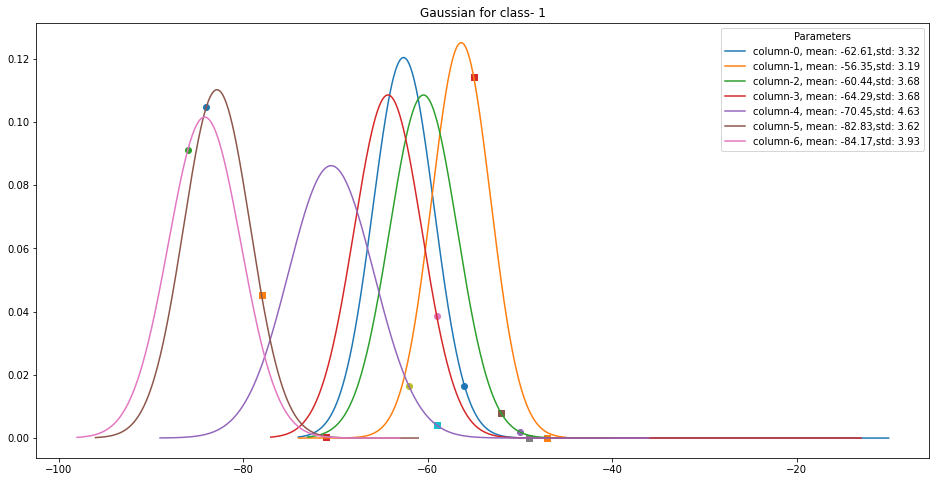

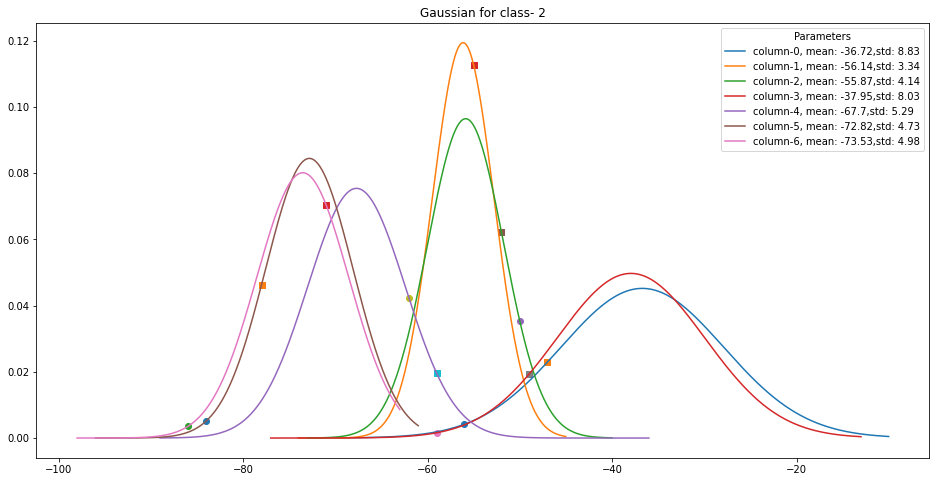

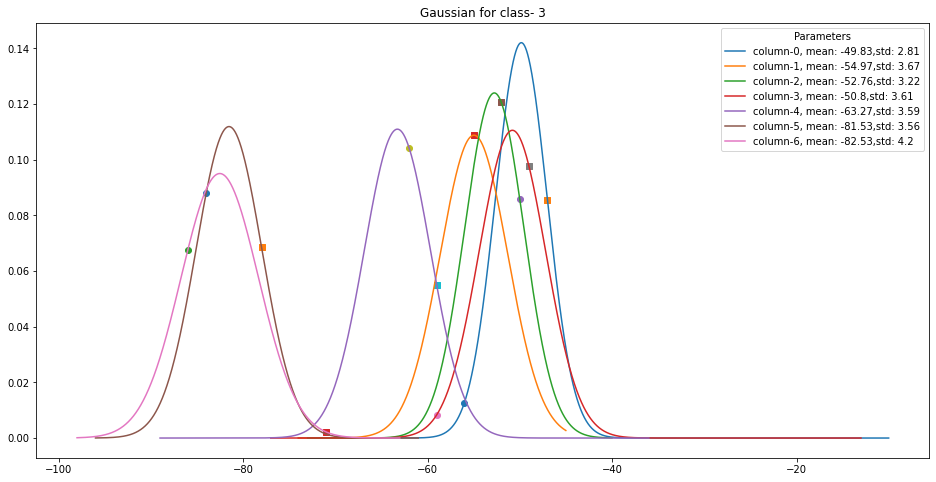

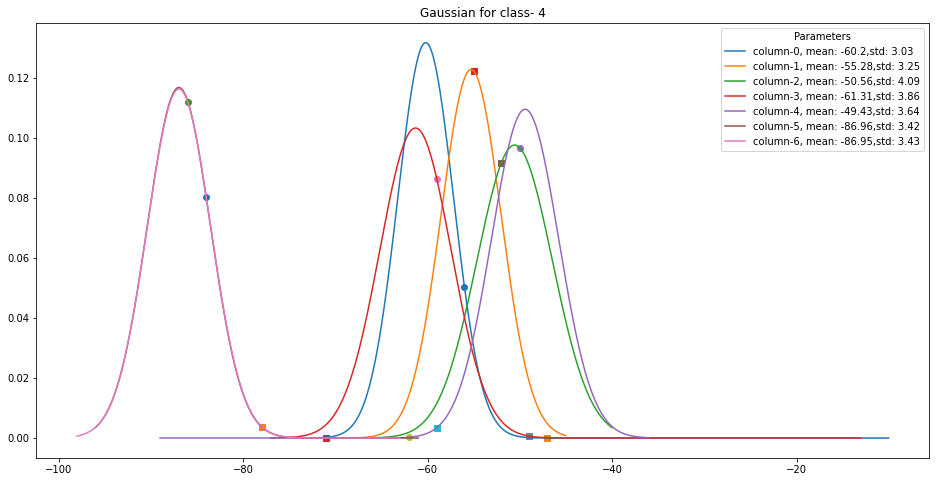

In [21]:
for r in labels:
  plt.figure(figsize=(16,8))

  x_axis = np.arange(X_train[:,0].min(), X_train[:,0].max(), 0.01)
  label='column-'+str(0)+', mean: '+str(round(d[r][0][0],2))+',std: '+str(round(d[r][0][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][0][0], d[r][0][1]),label=label)
  plt.scatter(X_test[misclassifiedIndexes[0],0], gaussianFormula(X_test[misclassifiedIndexes[0],0], (d[r][0][0], d[r][0][1])),marker='o')
  plt.scatter(X_test[misclassifiedIndexes[1],0], gaussianFormula(X_test[misclassifiedIndexes[1],0], (d[r][0][0], d[r][0][1])),marker='s')

  x_axis = np.arange(X_train[:,1].min(), X_train[:,1].max(), 0.01)
  label='column-'+str(1)+', mean: '+str(round(d[r][1][0],2))+',std: '+str(round(d[r][1][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][1][0], d[r][1][1]),label=label)
  plt.scatter(X_test[misclassifiedIndexes[0],1], gaussianFormula(X_test[misclassifiedIndexes[0],1], (d[r][1][0], d[r][1][1])),marker='o')
  plt.scatter(X_test[misclassifiedIndexes[1],1], gaussianFormula(X_test[misclassifiedIndexes[1],1], (d[r][1][0], d[r][1][1])),marker='s')

  x_axis = np.arange(X_train[:,2].min(), X_train[:,2].max(), 0.01)
  label='column-'+str(2)+', mean: '+str(round(d[r][2][0],2))+',std: '+str(round(d[r][2][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][2][0], d[r][2][1]),label=label)
  plt.scatter(X_test[misclassifiedIndexes[0],2], gaussianFormula(X_test[misclassifiedIndexes[0],2], (d[r][2][0], d[r][2][1])),marker='o')
  plt.scatter(X_test[misclassifiedIndexes[1],2], gaussianFormula(X_test[misclassifiedIndexes[1],2], (d[r][2][0], d[r][2][1])),marker='s')

  x_axis = np.arange(X_train[:,3].min(), X_train[:,3].max(), 0.01)
  label='column-'+str(3)+', mean: '+str(round(d[r][3][0],2))+',std: '+str(round(d[r][3][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][3][0], d[r][3][1]),label=label)
  plt.scatter(X_test[misclassifiedIndexes[0],3], gaussianFormula(X_test[misclassifiedIndexes[0],3], (d[r][3][0], d[r][3][1])),marker='o')
  plt.scatter(X_test[misclassifiedIndexes[1],3], gaussianFormula(X_test[misclassifiedIndexes[1],3], (d[r][3][0], d[r][3][1])),marker='s')

  x_axis = np.arange(X_train[:,4].min(), X_train[:,4].max(), 0.01)
  label='column-'+str(4)+', mean: '+str(round(d[r][4][0],2))+',std: '+str(round(d[r][4][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][4][0], d[r][4][1]),label=label)
  plt.scatter(X_test[misclassifiedIndexes[0],4], gaussianFormula(X_test[misclassifiedIndexes[0],4], (d[r][4][0], d[r][4][1])),marker='o')
  plt.scatter(X_test[misclassifiedIndexes[1],4], gaussianFormula(X_test[misclassifiedIndexes[1],4], (d[r][4][0], d[r][4][1])),marker='s')

  x_axis = np.arange(X_train[:,5].min(), X_train[:,5].max(), 0.01)
  label='column-'+str(5)+', mean: '+str(round(d[r][5][0],2))+',std: '+str(round(d[r][5][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][5][0], d[r][5][1]),label=label)
  plt.scatter(X_test[misclassifiedIndexes[0],5], gaussianFormula(X_test[misclassifiedIndexes[0],5], (d[r][5][0], d[r][5][1])),marker='o')
  plt.scatter(X_test[misclassifiedIndexes[1],5], gaussianFormula(X_test[misclassifiedIndexes[1],5], (d[r][5][0], d[r][5][1])),marker='s')

  x_axis = np.arange(X_train[:,6].min(), X_train[:,6].max(), 0.01)
  label='column-'+str(6)+', mean: '+str(round(d[r][6][0],2))+',std: '+str(round(d[r][6][1],2))
  plt.plot(x_axis, norm.pdf(x_axis, d[r][6][0], d[r][6][1]),label=label)
  plt.scatter(X_test[misclassifiedIndexes[0],6], gaussianFormula(X_test[misclassifiedIndexes[0],6], (d[r][6][0], d[r][6][1])),marker='o')
  plt.scatter(X_test[misclassifiedIndexes[1],6], gaussianFormula(X_test[misclassifiedIndexes[1],6], (d[r][6][0], d[r][6][1])),marker='s')

  plt.title('Gaussian for class- '+str(r))
  plt.legend(title='Parameters')
  plt.show()

### 5) Checking Redundancy via Correlation and repeating the experiments

<AxesSubplot:>

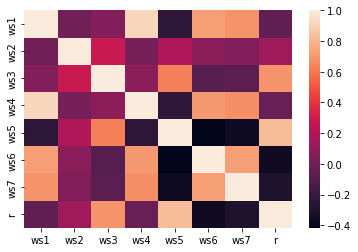

In [22]:
import seaborn  
data = pd.read_csv('wifiLocalization.txt', sep='\t')
correlation = data.corr()  
seaborn.heatmap(correlation)  

In [23]:
data.corr()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
ws1,1.000000,-0.003298,0.050814,0.921025,-0.244932,0.718429,0.686955,-0.058061
ws2,-0.003298,1.000000,0.282211,0.014604,0.200469,0.074002,0.048336,0.143254
ws3,0.050814,0.282211,1.000000,0.078292,0.618984,-0.091622,-0.073141,0.688467
ws4,0.921025,0.014604,0.078292,1.000000,-0.236021,0.706039,0.673294,-0.039363
ws5,-0.244932,0.200469,0.618984,-0.236021,1.000000,-0.416049,-0.361621,0.820530
ws6,0.718429,0.074002,-0.091622,0.706039,-0.416049,1.000000,0.723172,-0.360171
ws7,0.686955,0.048336,-0.073141,0.673294,-0.361621,0.723172,1.000000,-0.305075
r,-0.058061,0.143254,0.688467,-0.039363,0.820530,-0.360171,-0.305075,1.000000


###From above we can se that ws1 and ws4 have very high correlation, thus can be considered redundant features.This also can be concluded from graphs where blue and red lines are almost similar as their variance and mean are similar

In [24]:
#dropping ws1 and takiing only ws4 and performing experiment
d= estimateGaussianParameters(X_train[:,1:],y_train,labels)
priors=getPriors(X_train[:,1:],y_train,labels)

Y_pred=[]
for i in range(X_test.shape[0]):
    data = X_test[i,1:]
    maxProb=0
    mp=0
    for r in labels:
        prob=priors[r]
        for j in range(data.shape[0]):
            prob *= gaussianFormula(data[j],d[r][j])
        if(prob>maxProb):
            maxProb=prob
            mp=r
    Y_pred.append(mp)
Y_pred = np.asarray(Y_pred)

print("Accuracy on test data on removing WS1 column: ",accuracy_score(y_test,Y_pred) )

Accuracy on test data on removing WS1 column:  0.962


In [25]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')
data.corr()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
ws1,1.000000,-0.003298,0.050814,0.921025,-0.244932,0.718429,0.686955,-0.058061
ws2,-0.003298,1.000000,0.282211,0.014604,0.200469,0.074002,0.048336,0.143254
ws3,0.050814,0.282211,1.000000,0.078292,0.618984,-0.091622,-0.073141,0.688467
ws4,0.921025,0.014604,0.078292,1.000000,-0.236021,0.706039,0.673294,-0.039363
ws5,-0.244932,0.200469,0.618984,-0.236021,1.000000,-0.416049,-0.361621,0.820530
ws6,0.718429,0.074002,-0.091622,0.706039,-0.416049,1.000000,0.723172,-0.360171
ws7,0.686955,0.048336,-0.073141,0.673294,-0.361621,0.723172,1.000000,-0.305075
r,-0.058061,0.143254,0.688467,-0.039363,0.820530,-0.360171,-0.305075,1.000000


### from above we can see that ws1,ws4,ws6,ws7 are highly related columns, other are not related, so we can drop other columns and check how these 4 columns overpower

In [26]:
#taking only ws1,ws4,ws6,ws7 and performing experiment
d= estimateGaussianParameters(X_train[:,[0,3,5,6]],y_train,labels)
priors=getPriors(X_train[:,[0,3,5,6]],y_train,labels)

Y_pred=[]
for i in range(X_test.shape[0]):
    data = X_test[i,[0,3,5,6]]
    maxProb=0
    mp=0
    for r in labels:
        prob=priors[r]
        for j in range(data.shape[0]):
            prob *= gaussianFormula(data[j],d[r][j])
        if(prob>maxProb):
            maxProb=prob
            mp=r
    Y_pred.append(mp)
Y_pred = np.asarray(Y_pred)

print("Accuracy on test data on taking WS1,WS4,WS6,WS7 column: ",accuracy_score(y_test,Y_pred) )

Accuracy on test data on taking WS1,WS4,WS6,WS7 column:  0.91


6) Taking WS1 and WS5 as they are very highly correlated with output/labels. WS1 is negatively correlated and WS5 is highly positively correlated

In [27]:
#taking only ws1,ws5 and performing experiment as they have high correlation with labels , ws1-negative, ws5-positive
d= estimateGaussianParameters(X_train[:,[0,4]],y_train,labels)
priors=getPriors(X_train[:,[0,4]],y_train,labels)

Y_pred=[]
for i in range(X_test.shape[0]):
    data = X_test[i,[0,4]]
    maxProb=0
    mp=0
    for r in labels:
        prob=priors[r]
        for j in range(data.shape[0]):
            prob *= gaussianFormula(data[j],d[r][j])
        if(prob>maxProb):
            maxProb=prob
            mp=r
    Y_pred.append(mp)
Y_pred = np.asarray(Y_pred)

print("Accuracy on test data on taking WS1,WS5 column: ",accuracy_score(y_test,Y_pred) )

Accuracy on test data on taking WS1,WS5 column:  0.974


7) Using SKLEARN's Gaussian Bayes to compare accuracy

In [28]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)

print("Accuracy on test data using sklearn: ",accuracy_score(y_test,Y_pred) )

Accuracy on test data using sklearn:  0.986


In [29]:
d= estimateGaussianParameters(X_train,y_train,labels)
priors=getPriors(X_train,y_train,labels)

Y_pred=[]
for i in range(X_test.shape[0]):
    data = X_test[i,:]
    maxProb=0
    mp=0
    for r in labels:
        prob=priors[r]
        for j in range(data.shape[0]):
            prob *= gaussianFormula(data[j],d[r][j])
        if(prob>maxProb):
            maxProb=prob
            mp=r
    Y_pred.append(mp)
Y_pred = np.asarray(Y_pred)
print("Accuracy on test data using my Model: ",accuracy_score(y_test,Y_pred) )

Accuracy on test data using my Model:  0.986
